# 1. Import Librarys

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Plot feature distribution

### 2.1 Read CSV file

In [41]:
main_df = pd.read_csv('bank_auth.csv')
main_df.head()

,variance,skewness,curtosis,entropy,target
0,NaN,8.28950,-1.9213,-3.33320,0
1,-3.11280,-6.84100,10.7402,-1.01720,1
2,5.39150,9.99460,-3.8081,-3.36420,0
3,-1.30000,10.26780,NaN,-5.86380,0
4,-0.49241,0.89392,-1.6283,-0.56854,1


### 2.2 Plot distribution with handling null value

Drop NULL value for variance
(626,)


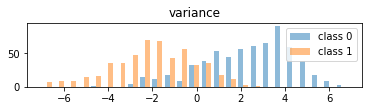

Replace NULL value with Mean for variance
(762,)


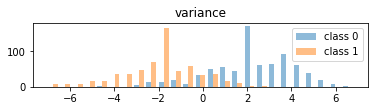

Replace NULL value with Median for variance
(762,)


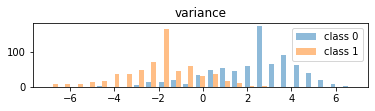

Drop NULL value for skewness
(601,)


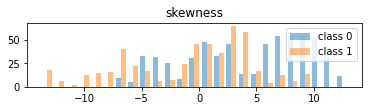

Replace NULL value with Mean for skewness
(762,)


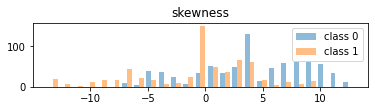

Replace NULL value with Median for skewness
(762,)


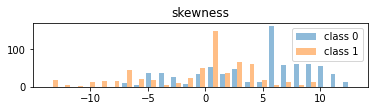

Drop NULL value for curtosis
(580,)


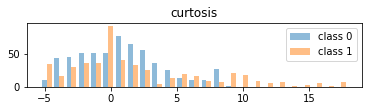

Replace NULL value with Mean for curtosis
(762,)


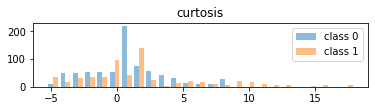

Replace NULL value with Median for curtosis
(762,)


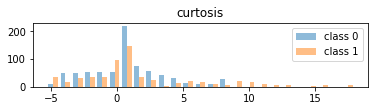

Drop NULL value for entropy
(564,)


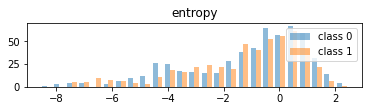

Replace NULL value with Mean for entropy
(762,)


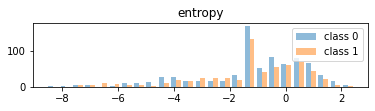

Replace NULL value with Median for entropy
(762,)


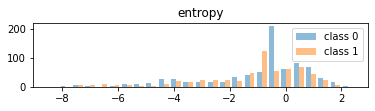

In [42]:
class plot:
    def plot_distribution(self,df,feature="variance"):
        plt.subplot(3,1,1)
        print("Drop NULL value for",feature)
        df_drop = df.copy()
        df_drop =df_drop.drop(axis="rows",labels = df_drop.index[df[feature].isna()])
        df1 = df_drop[df_drop["target"]==0][feature].copy()
        df1.drop(axis="rows",labels=df1.index[df1.duplicated()],inplace=True)
        df2 = df_drop[df_drop["target"]==1][feature].copy()
        df2.drop(axis="rows",labels=df2.index[df2.duplicated()],inplace=True)
        print(df1.shape)
        self._helper_function(df1,df2,feature)

        plt.subplot(3,1,2)
        print("Replace NULL value with Mean for",feature)
        df_mean = df.copy()
        df1 = df_mean[df_mean["target"]==0].fillna(df_mean[df_mean["target"]==0].mean())[feature].copy()
        df2 = df_mean[df_mean["target"]==1].fillna(df_mean[df_mean["target"]==1].mean())[feature].copy()
        print(df1.shape)
        self._helper_function(df1,df2,feature)

        plt.subplot(3,1,2)
        print("Replace NULL value with Median for",feature)
        df_median = df.copy()
        df1 = df_median[df_median["target"]==0].fillna(df_median[df_median["target"]==0].median())[feature].copy()
        df2 = df_median[df_median["target"]==1].fillna(df_median[df_median["target"]==1].median())[feature].copy()
        print(df1.shape)
        self._helper_function(df1,df2,feature)

        
    def _helper_function(self,df1,df2,feature):
        plt.hist((df1,df2) ,bins=25, alpha=0.5,label = ("class 0","class 1"))
        plt.legend(loc='upper right')
        plt.title(feature)
        plt.show()

p = plot()
p.plot_distribution(main_df.iloc[:,[0,4]],"variance")
p.plot_distribution(main_df.iloc[:,[1,4]],"skewness")
p.plot_distribution(main_df.iloc[:,[2,4]],"curtosis")
p.plot_distribution(main_df.iloc[:,[3,4]],"entropy")
    

# 3 NaiveBayes Classifier

### 3.1 Classification code

In [43]:
class NaiveBayesClassifier:
    def fit(self,x,y):
        samples,features = x.shape
        self._classes = np.unique(y)
        classes = len(self._classes)
        
        self._mean = np.zeros((classes,features),dtype=np.float64)
        self._var = np.zeros((classes,features),dtype=np.float64)
        self._priors = np.zeros(classes,dtype=np.float64)
        
        for c in self._classes:
            X_c = x[c==y];
            self._mean[c,:] = X_c.mean(axis = 0)
            self._var[c,:] = X_c.var(axis = 0)
            self._priors[c] = X_c.shape[0]/float(samples)
        
    def predict(self,X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self,x):
        posteriors = []
        for idx,c in enumerate(self._classes):
            prior = self._priors[idx]
            class_conditional = np.sum(self._pdf(idx,x))
            posterior = prior * class_conditional
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self,class_idx,x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x-mean)**2/(2*var))
        denometor = np.sqrt(2*(np.pi)*var)
        return numerator/denometor
    
    def accuracy(self,y_test,y_pred):
        acc = np.sum(y_test==y_pred)/len(y_test)
        return acc

### 3.2 code for calling classification class function

In [44]:
def Univariat_Gaussian_NB(df):
    nb = NaiveBayesClassifier()
    
    df_drop = df.copy()
    df_drop = df_drop.drop(axis = "rows",labels = df_drop.index[df_drop.iloc[:,0].isna()])
    df_drop.drop(axis="rows",labels=df_drop.index[df_drop.duplicated()],inplace=True)
    print("    accuracy by droping null value : ",_computation(nb,df_drop))
    
    df_mean = df.copy()
    df_mean = pd.concat([df_mean[df_mean["target"]==0].fillna(df_mean[df_mean["target"]==0].mean()),df_mean[df_mean["target"]==1].fillna(df_mean[df_mean["target"]==1].mean())])
    print("    accuracy by replacing null value with mean : ",_computation(nb,df_mean))
    
    df_median = df.copy()
    df_median = pd.concat([df_median[df_median["target"]==0].fillna(df_median[df_median["target"]==0].median()),df_median[df_median["target"]==1].fillna(df_median[df_median["target"]==1].median())])
    print("    accuracy by replacing null value with median: ",_computation(nb,df_median))
    
def _computation(nb,df):
    X = np.array(df.iloc[:,0])
    X = X.reshape(-1,1)
    y = np.array(df.iloc[:,1])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=116)
    nb.fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    return nb.accuracy(y_test,y_pred)


### 3.3 Call Classfiction class function feature wise

In [45]:
print("Feature : 'variance'")
Univariat_Gaussian_NB(main_df.iloc[:,[0,4]])
print("Feature : 'skewness'")
Univariat_Gaussian_NB(main_df.iloc[:,[1,4]])
print("Feature : 'curtosis'")
Univariat_Gaussian_NB(main_df.iloc[:,[2,4]])
print("Feature : 'entropy'")
Univariat_Gaussian_NB(main_df.iloc[:,[3,4]])

Feature : 'variance'
    accuracy by droping null value :  0.8527472527472527
    accuracy by replacing null value with mean :  0.8870673952641166
    accuracy by replacing null value with median:  0.8870673952641166
Feature : 'skewness'
    accuracy by droping null value :  0.6118721461187214
    accuracy by replacing null value with mean :  0.6775956284153005
    accuracy by replacing null value with median:  0.6721311475409836
Feature : 'curtosis'
    accuracy by droping null value :  0.6226851851851852
    accuracy by replacing null value with mean :  0.599271402550091
    accuracy by replacing null value with median:  0.6138433515482696
Feature : 'entropy'
    accuracy by droping null value :  0.5117370892018779
    accuracy by replacing null value with mean :  0.5446265938069217
    accuracy by replacing null value with median:  0.5446265938069217


# 4 Logistic Regression

### 4.1 Logistic Regression code

In [46]:
class LogisticRegression:
    
    def fit(self,X,y,iteration,learning_rate,opt = "gradient"):
        X = self._normalization(X)
        ones = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate((ones, X), axis = 1)
        self._samples,self._feature = X.shape
        self._itr = iteration
        self._lr = learning_rate
        if(opt == "gradient"):
            self._param = self._gradient(X,y)
        elif (opt == "newton"):
            self._param = self._newton(X,y)
        

    def _gradient(self,X,y):
        param = np.random.randn(self._feature)
        for i in range(self._itr):
            prob = self._sigmoid(X @ param)
            gdt = -(X.T @ (y-prob))/(len(y))
            param -= self._lr*gdt
        return param
    
    def _newton(self,X,y):
        param = np.random.randn(self._feature)
        prob = self._sigmoid(X @ param)
        B = np.zeros((self._samples,self._samples))
        for i in range(self._itr):
            prob = self._sigmoid(X @ param)
            gdt = -(X.T @ (y-prob))/(len(y))
            np.fill_diagonal(B,prob*(1-prob))
            H = X.T @ B @ X
            param -= np.linalg.inv(H) @ gdt
        return param
        
    def _normalization(self,X):
        return ((X - X.min())/(X.max() - X.min()))
    
    def _sigmoid(self,z):        
        return (1+np.exp(-z))**(-1)
    
    def predict(self,X):
        X = self._normalization(X)
        ones = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate((ones, X), axis = 1)
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self,x):
        p = self._sigmoid(x @ self._param)
        return p.round()
    
    def accuracy(self,y_test,y_pred):
        acc = np.sum(y_test==y_pred)/len(y_test)
        return acc


### 4.2 code for calling LR class function

In [47]:
def Logistic_Regression(df,opt = "gradient"):
    lr = LogisticRegression()
    
        
    df_drop = df.copy()
    df_drop.drop(axis = "rows",labels = df_drop.index[df_drop["variance"].isna()],inplace = True)
    df_drop.drop(axis = "rows",labels = df_drop.index[df_drop["skewness"].isna()],inplace = True)
    df_drop.drop(axis = "rows",labels = df_drop.index[df_drop["curtosis"].isna()],inplace = True)
    df_drop.drop(axis = "rows",labels = df_drop.index[df_drop["entropy"].isna()],inplace = True)
    df_drop.drop(axis="rows",labels=df_drop.index[df_drop.duplicated()],inplace=True)
    print("accuracy by droping null value row : ",_computationLR(lr,df_drop,opt))
    
    
    df_mean = df.copy()
    df_mean = pd.concat([df_mean[df_mean["target"]==0].fillna(df_mean[df_mean["target"]==0].mean()),df_mean[df_mean["target"]==1].fillna(df_mean[df_mean["target"]==1].mean())])
    df_mean.drop(axis="rows",labels=df_mean.index[df_mean.duplicated()],inplace=True)
    print("accuracy by replacing null value with mean value : ",_computationLR(lr,df_mean,opt))
    
    df_median = df.copy()
    df_median = pd.concat([df_median[df_median["target"]==0].fillna(df_median[df_median["target"]==0].median()),df_median[df_median["target"]==1].fillna(df_median[df_median["target"]==1].median())])
    df_median.drop(axis="rows",labels=df_median.index[df_median.duplicated()],inplace=True)
    print("accuracy by replacing null value with median value : ",_computationLR(lr,df_median,opt))
    
    
def _computationLR(lr,df,opt):
    X = np.array(df.iloc[:,:4])
    y = np.array(df.iloc[:,4])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=116)
    lr.fit(X_train,y_train,10000,0.1,opt)
    y_pred = lr.predict(X_test)
    return lr.accuracy(y_test,y_pred)
    

### 4.3 call LR class function for Gradient Descent anf Newton's method

In [48]:
Logistic_Regression(main_df,"gradient")
Logistic_Regression(main_df,"newton")

accuracy by droping null value row :  0.9242424242424242
accuracy by replacing null value with mean value :  0.9010989010989011
accuracy by replacing null value with median value :  0.9120879120879121
accuracy by droping null value row :  0.9886363636363636
accuracy by replacing null value with mean value :  0.9560439560439561
accuracy by replacing null value with median value :  0.9652014652014652
